In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [ ]:
"""
고객 데이터를 활용한 K-Means 클러스터링 분석
최적의 클러스터 수 결정 및 Silhouette Score를 통한 결과 평가

고객 데이터를 K-Means 클러스터링을 통해 세분화하고, 그 결과를 평가해야 합니다.
"""

In [4]:
# 데이터 불러오기
df = pd.read_csv('20250620_143916_mall_customers.csv')

In [5]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# 데이터 구조 확인
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# 전처리
# Annual Income (k$), Spending Score (1-100) 열만 사용
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print(df)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [ ]:
# 표준화
# 다양한 특성을 같은 기준에서 작동하도록 단위와 범위를 맞춰주는 작업
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [9]:
# 학습 및 테스트 데이터 분리 : 8:2 비율
X_train, X_test = train_test_split(scaled, test_size=0.2, random_state=42)

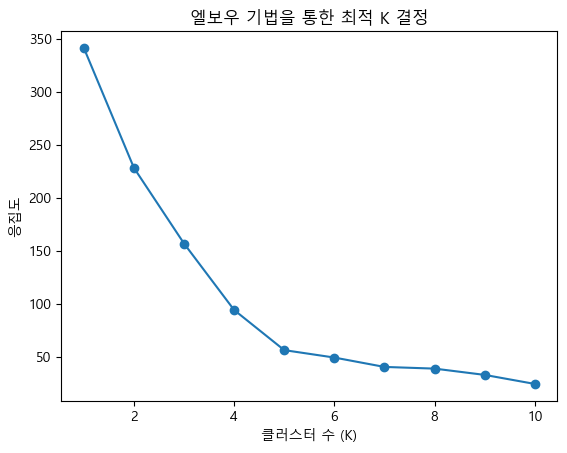

In [26]:
# 모델 학습
# 엘보우 기법 => 최적의 K 탐색
inertias = []       # 응집도
for k in range(1, 11) :
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)

# 엘보우 기법 시각화
# 최적 K 결정 => 5 => 감소 폭이 완만한 지점
plt.plot(range(1, 11), inertias, marker='o')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('엘보우 기법을 통한 최적 K 결정')
plt.xlabel('클러스터 수 (K)')
plt.ylabel('응집도')
plt.show()

In [ ]:
# 엘보우 기법 적용된 클러스터링 모델 학습
kmeans = KMeans(n_clusters=5, random_state=42)
y_train = kmeans.fit_predict(X_train)
y_test = kmeans.predict(X_test)

In [ ]:
# 평가 및 시각화
# Silhouette Score 계산
print('Train Silhouette Score : ', silhouette_score(X_train, y_train))
print('Test Silhouette Score : ', silhouette_score(X_test, y_test))
# 0.5 이상 : 군집화 상태 괜찮은 편

Train Silhouette Score :  0.5509842461121202
Test Silhouette Score :  0.566618490320996


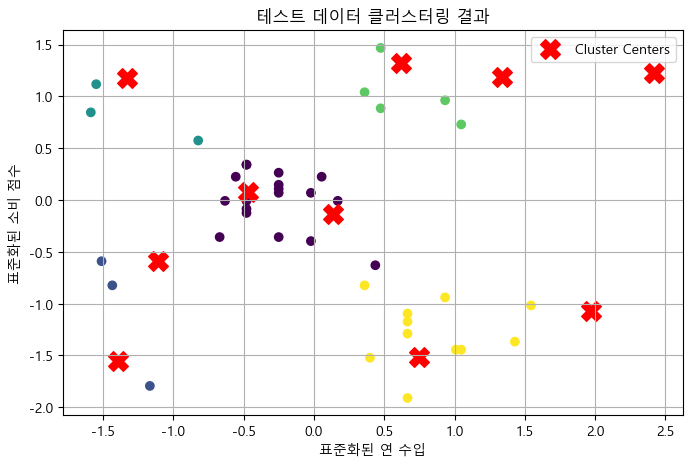

In [ ]:
# 클러스터 결과 시각화
plt.figure(figsize=(8, 5))  # 그래프 전체 크기 : 가로 8인치, 세로 5인치
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')   # X_test[:, 0] : 모든 행, 0번째 열
centers = kmeans.cluster_centers_   # 클러스터 중심 좌표 저장
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')  # 클러스터 중심 좌표 X 마커 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 기호 깨짐 방지
plt.title('테스트 데이터 클러스터링 결과')
plt.xlabel('표준화된 연 수입')
plt.ylabel('표준화된 소비 점수')
plt.legend()    # 범례 추가
plt.grid()
plt.show()

In [ ]:
# 클러스터별 특성 요약
# 원본 데이터 불러오기
original = pd.read_csv('20250620_143916_mall_customers.csv')
# 원본 데이터 KMeans 적용 => 각 고객이 몇 번 클러스터에 속하는지 예측
# 새로운 열 추가 => 고객 한 명 한 명이 자신이 속한 클러스터를 갖게 됨
# 표준화 하는 이유 : KMeans 모델이 표준화된 데이터로 학습했으니까
original['cluster'] = kmeans.predict(scaler.transform(original[['Annual Income (k$)', 'Spending Score (1-100)']]))
cluster_means = original.groupby('cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

print('클러스터별 평균 수입 및 소비 점수 : ')
print(cluster_means)
# 클러스터별 의미를 찾아내기 위한 과정

클러스터별 평균 수입 및 소비 점수 : 
         Annual Income (k$)  Spending Score (1-100)
cluster                                            
0                 55.296296               49.518519
1                 26.304348               20.913043
2                 25.727273               79.363636
3                 86.538462               82.128205
4                 88.200000               17.114286


In [ ]:
# 해석
# 이 클러스터는 어떤 유형의 고객인가? 파악 가능
print('클러스터 해석 : ')
for i, row in cluster_means.iterrows():
    income = row['Annual Income (k$)']
    score = row['Spending Score (1-100)']

    income_label = '고소득' if income > 70 else '중소득' if income > 40 else '저소득'
    score_label = '고소비' if score > 60 else '중소비' if score > 40 else '저소비'
    
    print(f" - 클러스터 {i}: {income_label} / {score_label}")

클러스터 해석 : 
 - 클러스터 0: 중소득 / 중소비
 - 클러스터 1: 저소득 / 저소비
 - 클러스터 2: 저소득 / 고소비
 - 클러스터 3: 고소득 / 고소비
 - 클러스터 4: 고소득 / 저소비
